In [14]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder


### Basic EDA

In [50]:


file_path = r"C:\Users\Zehra\Desktop\ML\data\cars_price.csv"
data = pd.read_csv(file_path)
data2=pd.read_csv(file_path)
# data2
data_after_excel = pd.read_csv(r"C:\Users\Zehra\Downloads\cars_price(in).csv")
data_after_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          28330 non-null  object 
 4   aspiration         27503 non-null  object 
 5   num-of-doors       27856 non-null  object 
 6   body-style         27496 non-null  object 
 7   drive-wheels       27921 non-null  object 
 8   engine-location    29098 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27604 non-null  object 
 15  num-of-cylinders   27664 non-null  object 
 16  engine-size        272

In [51]:
data_after_excel.isnull().sum().sum()

np.int64(73674)

In [52]:
data_after_excel.select_dtypes(include='object').isnull().sum().sum()

np.int64(43282)

In [53]:
def value_count_each_value(cols_list):
    for col in cols_list:
        print(data[col].value_counts())

In [54]:

file_path = r"C:\Users\Zehra\Desktop\ML\data\cars_price.csv"
data = pd.read_csv(file_path)

In [55]:
data_after_excel

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30327,1.0,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91.0,2bbl,3.03,NaN,9.0,68,5000,31.0,38.0,6695
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,...,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018


In [56]:
data_after_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          28330 non-null  object 
 4   aspiration         27503 non-null  object 
 5   num-of-doors       27856 non-null  object 
 6   body-style         27496 non-null  object 
 7   drive-wheels       27921 non-null  object 
 8   engine-location    29098 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27604 non-null  object 
 15  num-of-cylinders   27664 non-null  object 
 16  engine-size        272

In [57]:
data.shape[0]

30330

In [58]:
threshold = data_after_excel.shape[1] / 3  # 50% of total columns
rows_with_one_third_nulls = data_after_excel[data_after_excel.isnull().sum(axis=1) > threshold]


In [59]:
rows_with_one_third_nulls

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
516,1.0,168,toyota,gas,NaN,two,NaN,rwd,front,NaN,...,NaN,2bbl,NaN,3.03,9.0,NaN,4800,29.0,NaN,8058
2728,NaN,NaN,plymouth,gas,std,two,NaN,fwd,NaN,NaN,...,90.0,2bbl,2.97,3.23,9.4,68,NaN,37.0,41.0,5572
2827,1.0,?,alfa-romero,gas,std,two,hatchback,NaN,front,94.5,...,NaN,mpfi,NaN,3.47,NaN,NaN,5000,19.0,26.0,NaN
2895,NaN,NaN,toyota,gas,NaN,NaN,sedan,fwd,front,NaN,...,98.0,2bbl,3.19,3.03,9.0,70,4800,NaN,NaN,NaN
9944,0.0,108,nissan,NaN,std,four,NaN,fwd,front,NaN,...,NaN,mpfi,3.43,3.27,NaN,152,NaN,NaN,22.0,14399
10171,1.0,NaN,toyota,gas,NaN,two,NaN,fwd,front,NaN,...,92.0,2bbl,3.05,3.03,NaN,NaN,4800,35.0,39.0,5348
12477,NaN,134,NaN,gas,std,two,hardtop,rwd,front,98.4,...,NaN,mpfi,3.62,3.5,9.3,NaN,NaN,24.0,NaN,NaN
15605,NaN,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,NaN,...,183.0,idi,3.58,3.64,NaN,NaN,NaN,22.0,25.0,NaN
17442,0.0,188,NaN,gas,NaN,NaN,sedan,rwd,front,101.2,...,164.0,NaN,3.31,3.19,9.0,121,NaN,21.0,28.0,20970
27495,0.0,?,NaN,NaN,turbo,two,NaN,4wd,front,NaN,...,131.0,NaN,3.13,3.4,7.0,NaN,5500,NaN,NaN,?


In [60]:
rows_with_one_third_nulls.shape[0]/data_after_excel.shape[0]*100

0.036267721727662385

In [61]:
data_after_excel.shape

(30330, 26)

### Dropped rows where more than 1/3 of data was missing

In [62]:
data_after_excel.drop(rows_with_one_third_nulls.index,axis=0, inplace=True)

In [63]:
data_after_excel.shape

(30319, 26)

In [64]:
data_columns_categorical = data_after_excel.select_dtypes(include='object')
data_columns_numerical = data_after_excel.select_dtypes(include='number')

print('Shape of categorical',data_columns_categorical.shape[0])
print('Shape of numerical' ,data_columns_numerical.shape[0])

print("Null percentage in categorical data\n ",data_columns_categorical.isnull().sum()/data_columns_categorical.shape[0]*100)


print("Null percentage in numerical data\n ",data_columns_numerical.isnull().sum()/data_columns_numerical.shape[0]*100)


Shape of categorical 30319
Shape of numerical 30319
Null percentage in categorical data
  normalized-losses    10.003628
make                 10.221313
fuel-type             6.586629
aspiration            9.310993
num-of-doors          8.150005
body-style            9.327484
drive-wheels          7.942214
engine-location       4.060160
engine-type           8.974570
num-of-cylinders      8.776675
fuel-system           9.581451
bore                  9.746364
stroke                9.630925
horsepower           10.363139
peak-rpm              9.874996
price                10.020119
dtype: float64
Null percentage in numerical data
  symboling            10.026716
wheel-base           10.089383
length               10.122366
width                 9.690293
height               10.039909
curb-weight           9.970645
engine-size          10.076190
compression-ratio     9.891487
city-mpg             10.214717
highway-mpg           9.970645
dtype: float64


### For some reason columns that should be numerical are categorical

In [65]:
value_count_each_value(data_columns_categorical)

# this tells that python is having a hard time figuring out which is null and which is not

normalized-losses
?      5526
161    1543
91     1042
150     936
104     840
134     788
128     759
102     725
94      698
168     651
85      648
65      641
95      630
74      626
103     621
93      565
106     548
148     526
122     523
118     504
125     423
137     395
83      389
115     387
154     382
101     367
197     300
145     288
188     284
153     284
108     277
113     277
119     276
110     268
194     268
81      267
129     265
89      263
87      257
158     245
164     238
192     236
121     147
256     144
77      144
231     135
98      128
78      128
90      127
186     127
142     127
107     111
Name: count, dtype: int64
make
toyota           4229
nissan           2338
mazda            2277
mitsubishi       1796
honda            1644
subaru           1633
volkswagen       1614
peugot           1485
volvo            1370
dodge            1188
bmw              1109
mercedes-benz    1089
plymouth          906
audi              903
saab              8

there some columns which should be float but python calls them object because of 
- price
- ?        563
- 18150    287
- 8495     280
- 6692     270
- 6229     266


In [66]:
cols_to_convert = ['normalized-losses','bore', 'stroke', 'horsepower', 'peak-rpm','price']
for col in cols_to_convert:
    data_after_excel[col]= pd.to_numeric(data_after_excel[col], errors='coerce')

In [67]:
data = data_after_excel

After changing the "?" to numeric

In [68]:
data_columns_categorical = data.select_dtypes(include='object')
data_columns_numerical = data.select_dtypes(include='number')

print('Shape of categorical',data_columns_categorical.shape[0])
print('Shape of numerical' ,data_columns_numerical.shape[0])

print("Null percentage in categorical data\n ",data_columns_categorical.isnull().sum()/data_columns_categorical.shape[0]*100)


print("Null percentage in numerical data\n ",data_columns_numerical.isnull().sum()/data_columns_numerical.shape[0]*100)


Shape of categorical 30319
Shape of numerical 30319
Null percentage in categorical data
  make                10.221313
fuel-type            6.586629
aspiration           9.310993
num-of-doors         8.150005
body-style           9.327484
drive-wheels         7.942214
engine-location      4.060160
engine-type          8.974570
num-of-cylinders     8.776675
fuel-system          9.581451
dtype: float64
Null percentage in numerical data
  symboling            10.026716
normalized-losses    28.223226
wheel-base           10.089383
length               10.122366
width                 9.690293
height               10.039909
curb-weight           9.970645
engine-size          10.076190
bore                 11.497741
stroke               11.385600
compression-ratio     9.891487
horsepower           11.220687
peak-rpm             10.699561
city-mpg             10.214717
highway-mpg           9.970645
price                11.873743
dtype: float64


In [69]:
value_count_each_value(data_columns_categorical)

make
toyota           4225
nissan           2337
mazda            2277
mitsubishi       1796
honda            1644
subaru           1633
volkswagen       1614
peugot           1485
volvo            1370
dodge            1188
bmw              1109
mercedes-benz    1088
plymouth          905
audi              903
saab              824
porsche           642
isuzu             561
chevrolet         419
jaguar            416
alfa-romero       400
renault           259
mercury           125
Name: count, dtype: int64
fuel-type
gas       25685
diesel     2637
Name: count, dtype: int64
aspiration
std      22515
turbo     4981
Name: count, dtype: int64
num-of-doors
four    15628
two     11960
?         260
Name: count, dtype: int64
body-style
sedan          12937
hatchback       9376
wagon           3361
hardtop         1015
convertible      802
Name: count, dtype: int64
drive-wheels
fwd    16183
rwd    10466
4wd     1262
Name: count, dtype: int64
engine-location
front    28726
rear       362
Nam

In [70]:
value_count_each_value(data_columns_numerical.columns)

symboling
 0.0    9012
 1.0    7128
 2.0    4258
 3.0    3624
-1.0    2890
-2.0     367
Name: count, dtype: int64
normalized-losses
161.0    1543
91.0     1041
150.0     936
104.0     840
134.0     787
128.0     759
102.0     725
94.0      698
168.0     650
85.0      648
65.0      641
95.0      630
74.0      626
103.0     621
93.0      564
106.0     548
148.0     526
122.0     523
118.0     504
125.0     423
137.0     395
83.0      389
115.0     387
154.0     382
101.0     367
197.0     300
145.0     288
153.0     284
188.0     283
113.0     277
119.0     276
108.0     276
110.0     268
194.0     268
81.0      267
129.0     265
89.0      263
87.0      257
158.0     245
164.0     238
192.0     236
121.0     147
256.0     144
77.0      144
231.0     135
98.0      128
78.0      128
90.0      127
186.0     127
142.0     127
107.0     111
Name: count, dtype: int64
wheel-base
94.5     2773
93.7     2597
95.7     1697
96.5     1021
97.3      941
98.4      929
107.9     845
96.3      831
99.1 

When we run the following we can easily see how normalized losses convert from '?' to NAN

In [71]:
data['normalized-losses']

0          NaN
1          NaN
2          NaN
3        164.0
4        164.0
         ...  
30325    150.0
30326    168.0
30327    113.0
30328    186.0
30329     65.0
Name: normalized-losses, Length: 30319, dtype: float64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30319 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27279 non-null  float64
 1   normalized-losses  21762 non-null  float64
 2   make               27220 non-null  object 
 3   fuel-type          28322 non-null  object 
 4   aspiration         27496 non-null  object 
 5   num-of-doors       27848 non-null  object 
 6   body-style         27491 non-null  object 
 7   drive-wheels       27911 non-null  object 
 8   engine-location    29088 non-null  object 
 9   wheel-base         27260 non-null  float64
 10  length             27250 non-null  float64
 11  width              27381 non-null  float64
 12  height             27275 non-null  float64
 13  curb-weight        27296 non-null  float64
 14  engine-type        27598 non-null  object 
 15  num-of-cylinders   27658 non-null  object 
 16  engine-size        27264 no

Cross checking whether left object types are actually object or just acting as one because of one or more weird symbols like '?'

In [73]:
data.select_dtypes(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,NaN,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,NaN,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,NaN,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,NaN,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
30325,mazda,gas,std,two,hatchback,rwd,front,rotor,two,mpfi
30326,toyota,gas,std,two,hatchback,rwd,front,dohc,four,mpfi
30327,mazda,gas,std,four,sedan,fwd,front,ohc,four,2bbl
30328,porsche,gas,std,NaN,hatchback,rwd,front,ohc,four,mpfi


### MSNO helps us to figure out how much of each categorical column is missing

<Axes: >

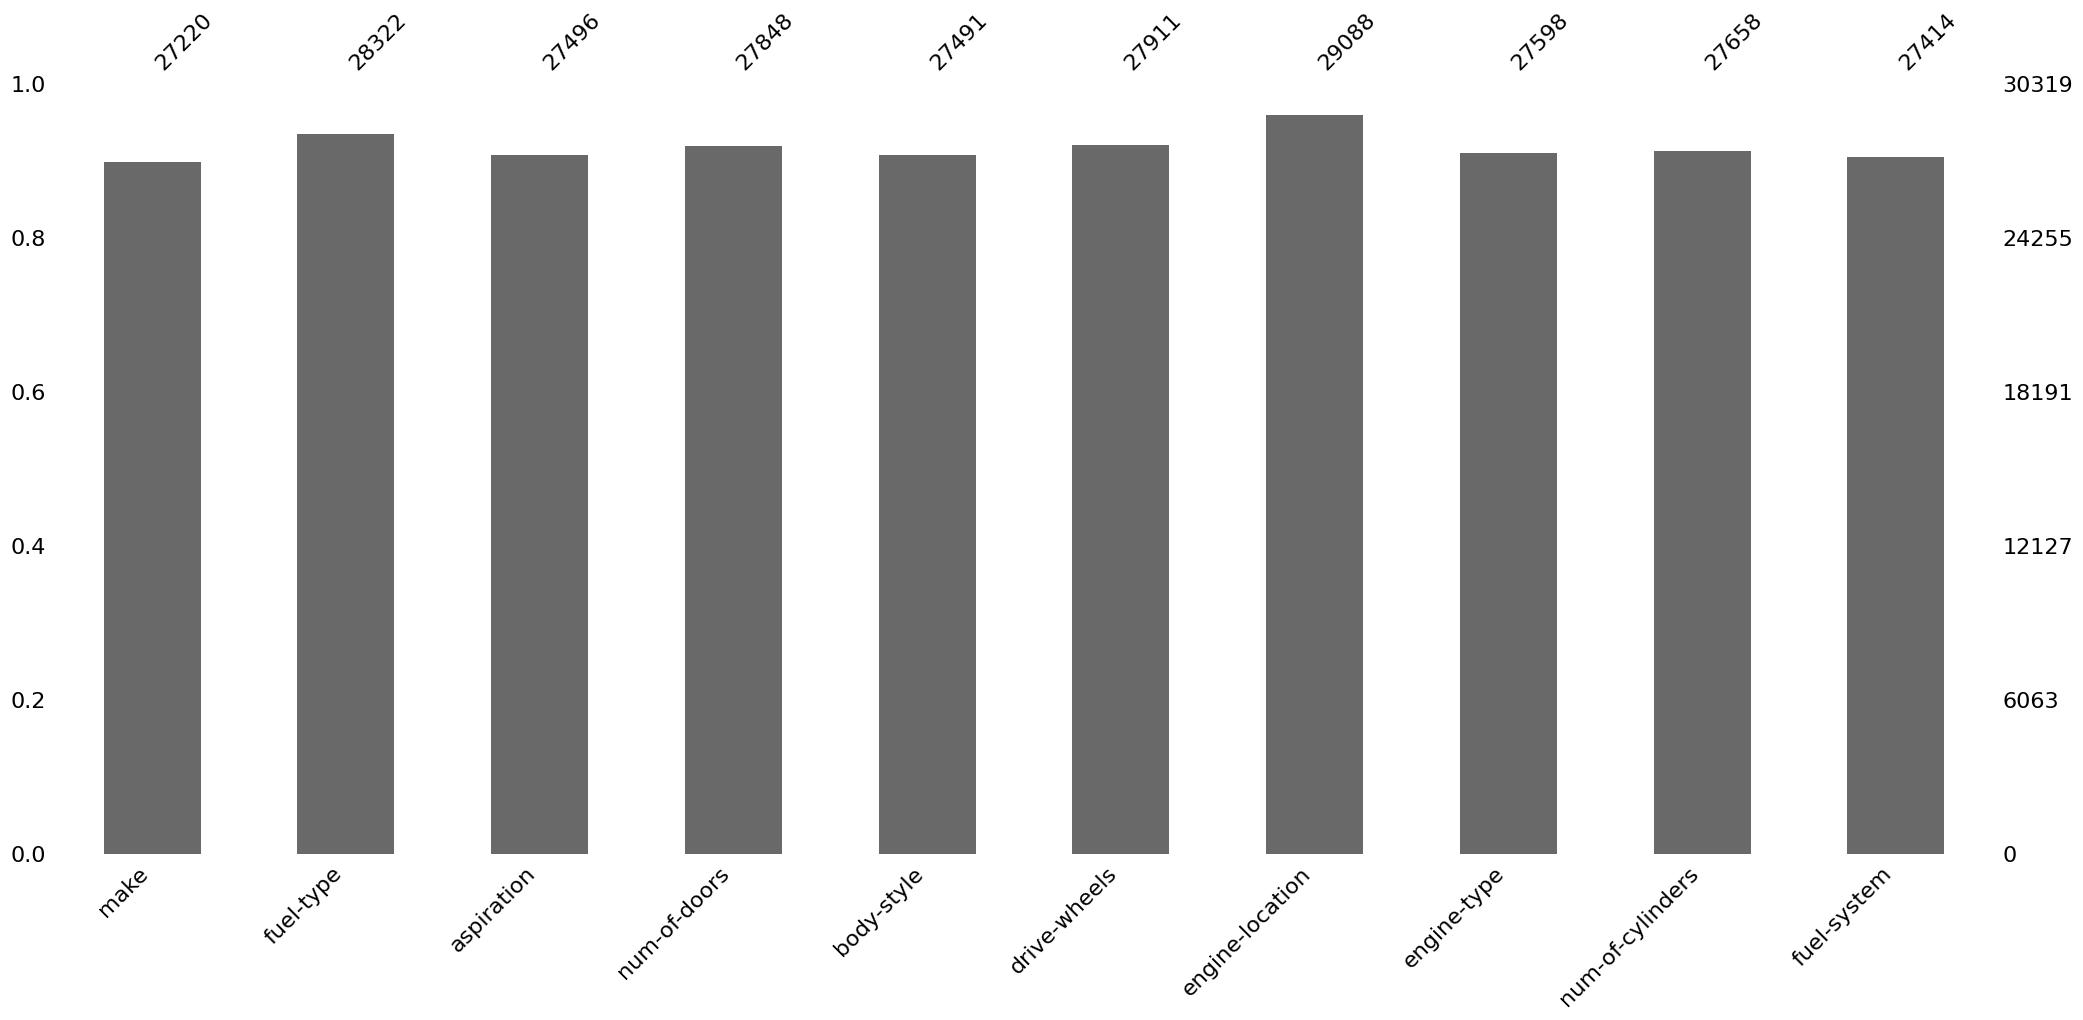

In [74]:
msno.bar(data.select_dtypes(include='object'))

### Finding correlations to better handle the data

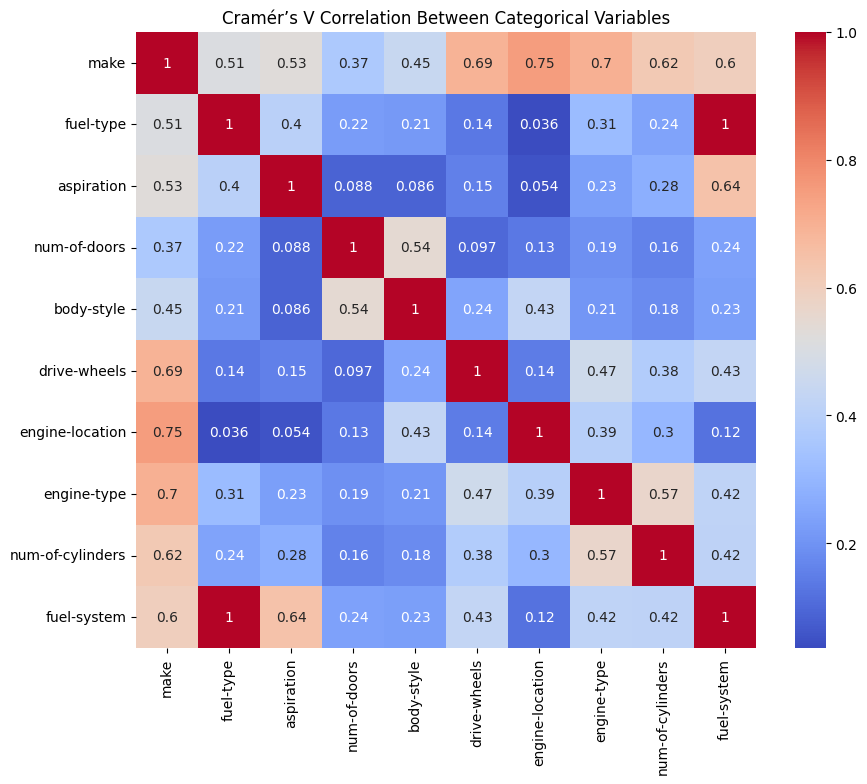

In [75]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

cat_cols = data.select_dtypes(include='object').columns
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])
        else:
            cramer_matrix.loc[col1, col2] = 1.0

cramer_matrix = cramer_matrix.astype(float)
plt.figure(figsize=(10,8))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm")
plt.title("Cramér’s V Correlation Between Categorical Variables")
plt.show() 


In [76]:
data['engine-location'].value_counts()

engine-location
front    28726
rear       362
Name: count, dtype: int64

The following will confirm the correlation of categorical variables

In [77]:

filtered_data = data[(data['drive-wheels'] == '4wd') & (data['engine-location'] == 'front') &
                     (data['engine-type']=='ohc') &
                     (data['num-of-cylinders']=='five') &
                     (data['fuel-system']=='mpfi')]
                     
                     
print(filtered_data['make'].value_counts())


make
audi    213
Name: count, dtype: int64


In [78]:
# before imputing 
data['make'].isnull().sum()

np.int64(3099)

In [770]:
data.select_dtypes(include='object').isnull().sum()

make                3098
fuel-type           3016
aspiration          2970
num-of-doors        3005
body-style          2997
drive-wheels        3112
engine-location     2974
engine-type         3038
num-of-cylinders    3025
fuel-system         3077
dtype: int64

## Handling Categorical Values

### Handling aspiration
- least number of nulls are in aspiration
- But aspiration doesn't  have strong relation with other variables

In [80]:

# aspiration = std when  fuel system  = spfi
# aspiration = std when  fuel system  = 4bbl
# aspiration = turbo when  fuel system  = mfi
fuel_system_aspiration = data.groupby('fuel-system')['aspiration'].value_counts()
fuel_system_aspiration


fuel-system  aspiration
1bbl         std           1264
2bbl         std           8054
4bbl         std            349
idi          turbo         1594
             std            796
mfi          turbo          120
mpfi         std           9711
             turbo         1790
spdi         turbo          962
             std            124
spfi         std            151
Name: count, dtype: int64

In [81]:
data['aspiration'].isnull().sum()
# np.int64(2970)

np.int64(2823)

In [82]:
most_frequent_aspiration = data.groupby('fuel-system')['aspiration'].agg(lambda x: x.mode()[0])

data['aspiration'] = data['aspiration'].fillna(data['fuel-system'].map(most_frequent_aspiration))



In [42]:
fuel_system_aspiration = data.groupby('fuel-system')['aspiration'].value_counts()
fuel_system_aspiration


fuel-system  aspiration
1bbl         std            1405
2bbl         std            8830
4bbl         std             393
idi          turbo          1825
             std             796
mfi          turbo           130
mpfi         std           10886
             turbo          1790
spdi         turbo          1083
             std             124
spfi         std             152
Name: count, dtype: int64

In [83]:
data=data.dropna(subset=['aspiration'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29995 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          26989 non-null  float64
 1   normalized-losses  21528 non-null  float64
 2   make               26925 non-null  object 
 3   fuel-type          28021 non-null  object 
 4   aspiration         29995 non-null  object 
 5   num-of-doors       27549 non-null  object 
 6   body-style         27201 non-null  object 
 7   drive-wheels       27623 non-null  object 
 8   engine-location    28779 non-null  object 
 9   wheel-base         26975 non-null  float64
 10  length             26963 non-null  float64
 11  width              27096 non-null  float64
 12  height             26982 non-null  float64
 13  curb-weight        27012 non-null  float64
 14  engine-type        27308 non-null  object 
 15  num-of-cylinders   27362 non-null  object 
 16  engine-size        26968 no

### handling num of doors, can't drop yet because the number of rows replaced are huge

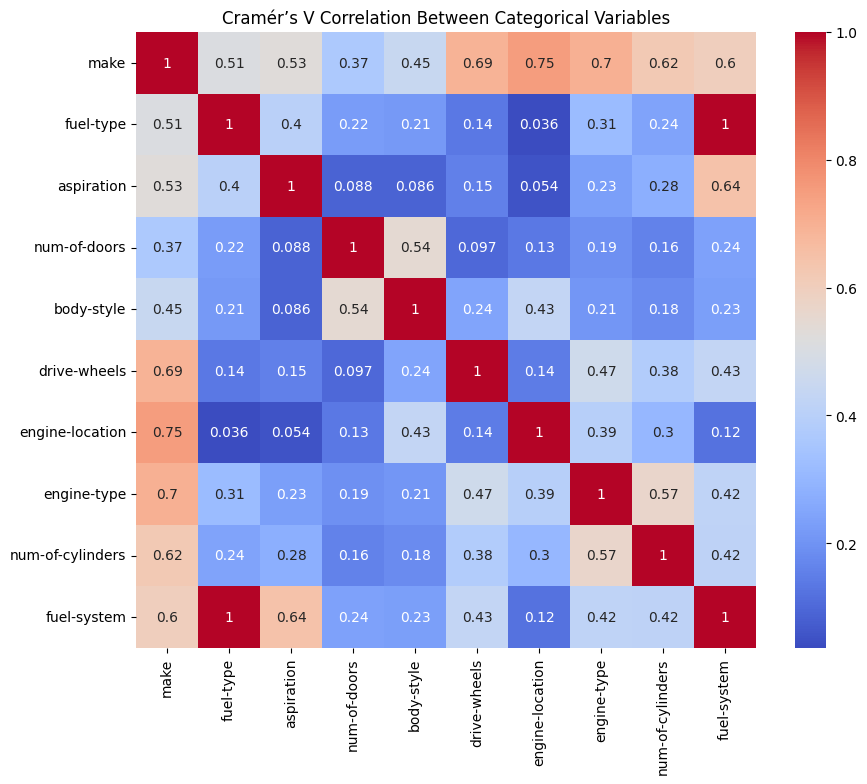

In [84]:
fuel_system_aspiration = data.groupby(['num-of-doors'])['body-style'].value_counts()
fuel_system_aspiration

num-of-doors  body-style 
?             sedan           235
four          sedan          9551
              wagon          3319
              hatchback      1204
two           hatchback      7180
              sedan          1780
              hardtop         997
              convertible     789
Name: count, dtype: int64

In [90]:
data['num-of-doors'].replace('?','four', inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\2336711716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['num-of-doors'].replace('?','four', inplace=True)
C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\2336711716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num-of-doors'].replace('?','four', inplace=True)


In [93]:

fuel_system_aspiration = data.groupby('num-of-doors')['body-style'].value_counts()
fuel_system_aspiration

num-of-doors  body-style 
four          sedan          9786
              wagon          3319
              hatchback      1204
two           hatchback      7180
              sedan          1780
              hardtop         997
              convertible     789
Name: count, dtype: int64

In [94]:


# Replace  'hardtop', 'convertible' with 'two' in 'body-style' where 'num-of-doors' is 'two'
# Replace 'num-of-doors' with 'two' where 'body-style' is 'sedan', 'hardtop', or 'convertible'
data.loc[data['body-style'].isin(['hardtop', 'convertible']), 'num-of-doors'] = 'two'


In [ ]:
data['num-of-doors'].fillna('four', inplace=True)


- Since, no rows were set to two, all of these rows should have 4 doors

### Remaking correlations beause of changed relations

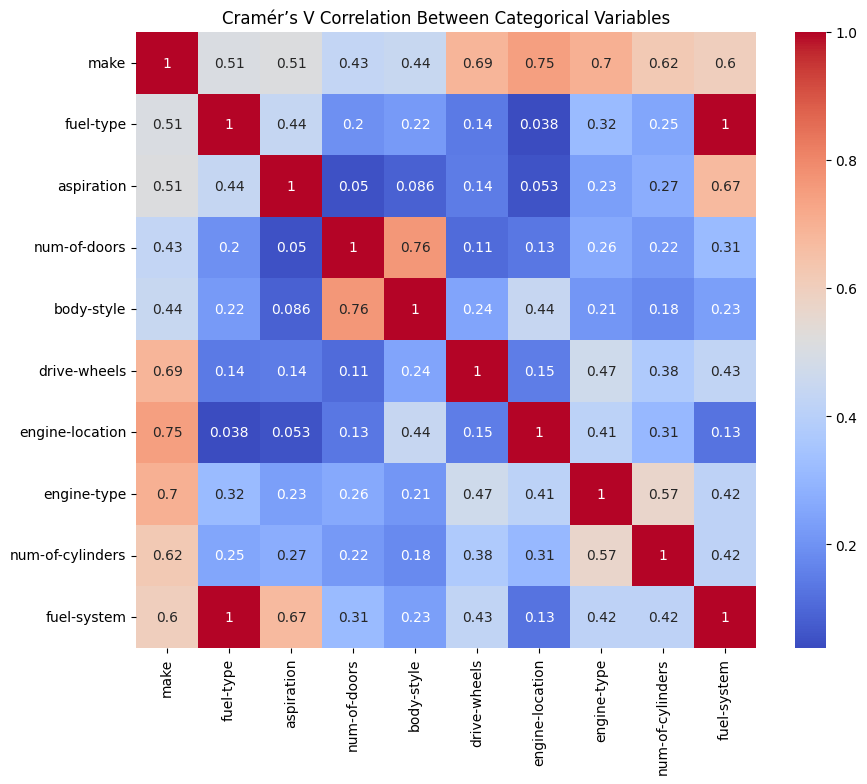

In [735]:
cat_cols = data.select_dtypes(include='object').columns
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])
        else:
            cramer_matrix.loc[col1, col2] = 1.0

cramer_matrix = cramer_matrix.astype(float)
plt.figure(figsize=(10,8))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm")
plt.title("Cramér’s V Correlation Between Categorical Variables")
plt.show() 


- normalized losses null count has increased significantly for some reason
- the rest nulls are decreasing

In [780]:
data['body-style'].value_counts()

body-style
sedan          12640
hatchback       9259
wagon           3319
hardtop          997
convertible      789
Name: count, dtype: int64

In [736]:
data.isnull().sum()

symboling            3001
normalized-losses    8449
make                 3069
fuel-type            2983
aspiration              0
num-of-doors         2971
body-style           2963
drive-wheels         3067
engine-location      2931
wheel-base           3017
length               3029
width                2891
height               3011
curb-weight          2981
engine-type          2996
num-of-cylinders     2993
engine-size          3022
fuel-system          2729
bore                 3433
stroke               3411
compression-ratio    2955
horsepower           3363
peak-rpm             3206
city-mpg             3066
highway-mpg          2984
price                3551
dtype: int64

### handling num-of-doors
- since we know num of doors is only strongly correlation with body-style and that doesn't help
- dropping it

In [779]:
data_after_drop = data.dropna(subset=['num-of-doors'])
data_after_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26996 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          24295 non-null  float64
 1   normalized-losses  19380 non-null  float64
 2   make               24222 non-null  object 
 3   fuel-type          24299 non-null  object 
 4   aspiration         26996 non-null  object 
 5   num-of-doors       26996 non-null  object 
 6   body-style         24345 non-null  object 
 7   drive-wheels       24216 non-null  object 
 8   engine-location    24363 non-null  object 
 9   wheel-base         24276 non-null  float64
 10  length             24270 non-null  float64
 11  width              24389 non-null  float64
 12  height             24289 non-null  float64
 13  curb-weight        24315 non-null  float64
 14  engine-type        24304 non-null  object 
 15  num-of-cylinders   24314 non-null  object 
 16  engine-size        24255 no

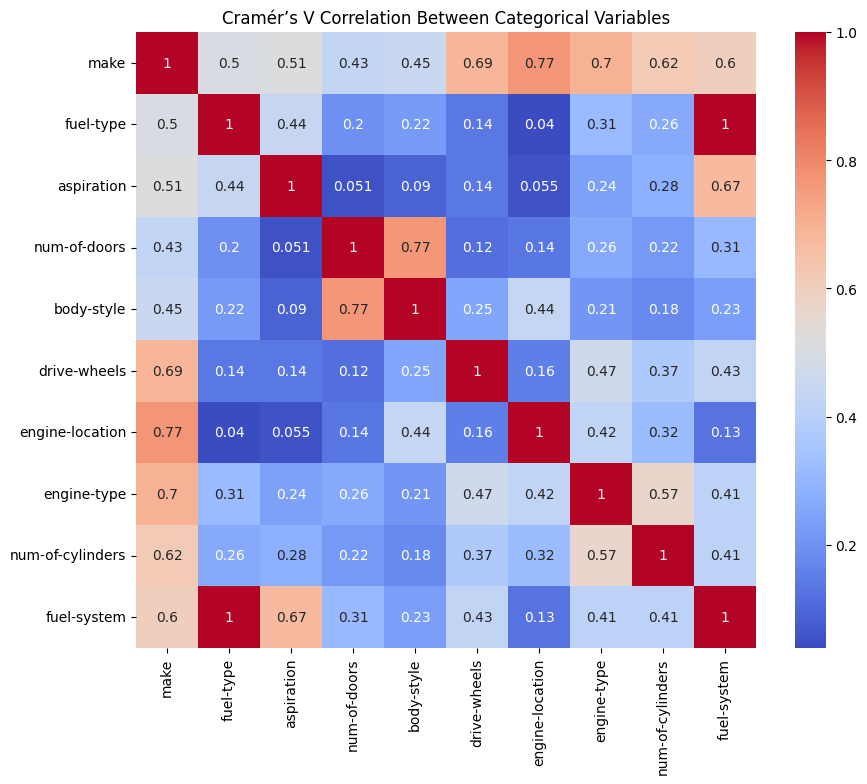

In [606]:
cat_cols = data.select_dtypes(include='object').columns
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])
        else:
            cramer_matrix.loc[col1, col2] = 1.0

cramer_matrix = cramer_matrix.astype(float)
plt.figure(figsize=(10,8))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm")
plt.title("Cramér’s V Correlation Between Categorical Variables")
plt.show() 


In [607]:
data = data.dropna(subset=['fuel-type'])

### Handling fuel-type

- Fuel type doesn't have strong correlation with any of the features. 

In [104]:
data.groupby(['make'])['fuel-type'].value_counts()

make           fuel-type
alfa-romero    gas           392
audi           gas           900
bmw            gas          1109
chevrolet      gas           419
dodge          gas          1178
honda          gas          1633
isuzu          gas           561
jaguar         gas           416
mazda          gas          1793
               diesel        243
mercedes-benz  diesel        504
               gas           466
mercury        gas           125
mitsubishi     gas          1777
nissan         gas          1957
               diesel         93
peugot         gas           701
               diesel        620
plymouth       gas           823
porsche        gas           593
renault        gas           222
saab           gas           745
subaru         gas          1607
toyota         gas          3432
               diesel        322
volkswagen     gas           971
               diesel        465
volvo          gas          1109
               diesel        104
Name: count, dtype

- Filling those which can only have gas

In [105]:
# First, identify the makes that ONLY use 'gas'
makes_with_only_gas = data.groupby('make')['fuel-type'].nunique()
makes_with_only_gas = makes_with_only_gas[makes_with_only_gas == 1].index

# Now, confirm which of these only use 'gas'
only_gas_makes = data[data['make'].isin(makes_with_only_gas)]
only_gas_makes = only_gas_makes.groupby('make')['fuel-type'].first()
only_gas_makes = only_gas_makes[only_gas_makes == 'gas'].index

# Impute missing fuel-types with 'gas' for these makes
data.loc[data['make'].isin(only_gas_makes) & data['fuel-type'].isnull(), 'fuel-type'] = 'gas'


- The rest has to be diesel

In [110]:
data['fuel-type'].fillna('diesel', inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\1710556891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel-type'].fillna('diesel', inplace=True)


### Handling drive wheels, num of cylinders
- strongly corr with make but still hard to figure out

In [117]:
data.select_dtypes(include='object').isnull().sum()

make                3070
fuel-type              0
aspiration             0
num-of-doors           0
body-style          2794
drive-wheels        2372
engine-location     1216
engine-type         2687
num-of-cylinders    2633
fuel-system         2581
dtype: int64

In [121]:
data.groupby(['drive-wheels'])['make'].value_counts()

drive-wheels  make         
4wd           subaru            642
              audi              237
              toyota            236
fwd           toyota           1819
              mitsubishi       1777
              nissan           1736
              volkswagen       1602
              honda            1448
              mazda            1303
              dodge            1080
              subaru            794
              saab              734
              plymouth          674
              audi              573
              chevrolet         373
              isuzu             259
              renault           256
rwd           toyota           1681
              volvo            1352
              peugot           1298
              bmw              1109
              mercedes-benz     953
              mazda             719
              porsche           572
              jaguar            416
              alfa-romero       355
              nissan            355


- No proper pattern identified

In [127]:
data['drive-wheels'].fillna(data['drive-wheels'].mode()[0], inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\619791618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['drive-wheels'].fillna(data['drive-wheels'].mode()[0], inplace=True)


In [133]:
data['num-of-cylinders'].fillna(data['num-of-cylinders'].mode()[0], inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\516173221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num-of-cylinders'].fillna(data['num-of-cylinders'].mode()[0], inplace=True)


### handling engine locations

In [135]:
data.groupby(['engine-location'])['make'].value_counts()

engine-location  make         
front            toyota           4160
                 nissan           2115
                 mazda            2048
                 mitsubishi       1777
                 subaru           1607
                 volkswagen       1602
                 honda            1476
                 peugot           1392
                 volvo            1352
                 dodge            1178
                 mercedes-benz    1071
                 bmw              1029
                 audi              900
                 plymouth          840
                 saab              813
                 isuzu             520
                 jaguar            416
                 chevrolet         374
                 alfa-romero       337
                 renault           256
                 porsche           243
                 mercury           125
rear             porsche           316
Name: count, dtype: int64

In [137]:
data.loc[(data['make'] == 'porsche') & (data['engine-location'].isnull()), 'engine-location'] = 'rear'
data.loc[(data['make'] != 'porsche') & (data['engine-location'].isnull()), 'engine-location'] = 'front'


### handling engine-type

In [140]:
data['engine-type'].fillna(data['engine-type'].mode()[0], inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\2671227993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine-type'].fillna(data['engine-type'].mode()[0], inplace=True)


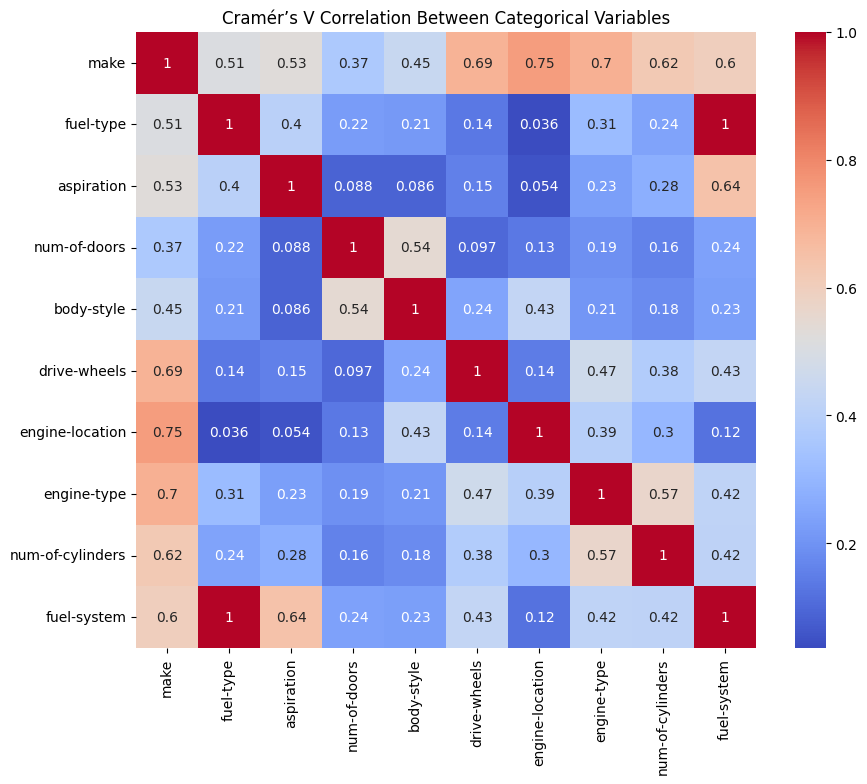

In [146]:
data['fuel-system'].fillna(data['fuel-system'].mode()[0], inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\1738164348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel-system'].fillna(data['fuel-system'].mode()[0], inplace=True)


### Handling make, body-style

In [151]:
data['body-style'].fillna(data['body-style'].mode()[0], inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\735725446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['body-style'].fillna(data['body-style'].mode()[0], inplace=True)


In [154]:
data['make'].fillna(data['make'].mode()[0], inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_9060\901480140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['make'].fillna(data['make'].mode()[0], inplace=True)


In [155]:
data.select_dtypes(include=['object', 'category']).isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

## Handling Numerical Columns

In [19]:
data.info()

NameError: name 'data' is not defined

In [ ]:
data.to_csv("cats_data_cleaned.csv", index=False)


- Reading categorically cleaned data 

In [21]:
data_ = pd.read_csv('cats_data_cleaned.csv')
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29995 entries, 0 to 29994
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          26989 non-null  float64
 1   normalized-losses  21528 non-null  float64
 2   make               29995 non-null  object 
 3   fuel-type          29995 non-null  object 
 4   aspiration         29995 non-null  object 
 5   num-of-doors       29995 non-null  object 
 6   body-style         29995 non-null  object 
 7   drive-wheels       29995 non-null  object 
 8   engine-location    29995 non-null  object 
 9   wheel-base         26975 non-null  float64
 10  length             26963 non-null  float64
 11  width              27096 non-null  float64
 12  height             26982 non-null  float64
 13  curb-weight        27012 non-null  float64
 14  engine-type        29995 non-null  object 
 15  num-of-cylinders   29995 non-null  object 
 16  engine-size        269

In [22]:
numerical_col = data_.select_dtypes(include='number')
numerical_col

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,88.6,168.8,64.1,NaN,2548.0,NaN,3.47,2.68,9.0,111.0,NaN,21.0,27.0,13495.0
1,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,NaN,21.0,27.0,16500.0
2,1.0,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,NaN,3.47,9.0,154.0,NaN,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,NaN,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,NaN,NaN,54.3,2824.0,136.0,NaN,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,3.0,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,9.4,135.0,NaN,NaN,NaN,15645.0
29991,NaN,168.0,94.5,168.7,64.0,52.6,2300.0,98.0,3.24,NaN,9.4,112.0,6600.0,26.0,29.0,9538.0
29992,1.0,113.0,93.1,166.8,64.2,54.1,1945.0,91.0,3.03,NaN,9.0,68.0,5000.0,31.0,38.0,6695.0
29993,3.0,186.0,94.5,168.9,NaN,50.2,2778.0,151.0,3.94,NaN,9.5,143.0,5500.0,19.0,27.0,22018.0


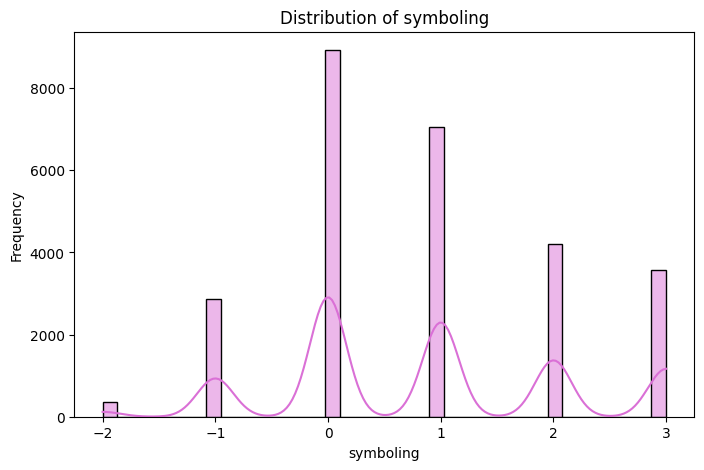

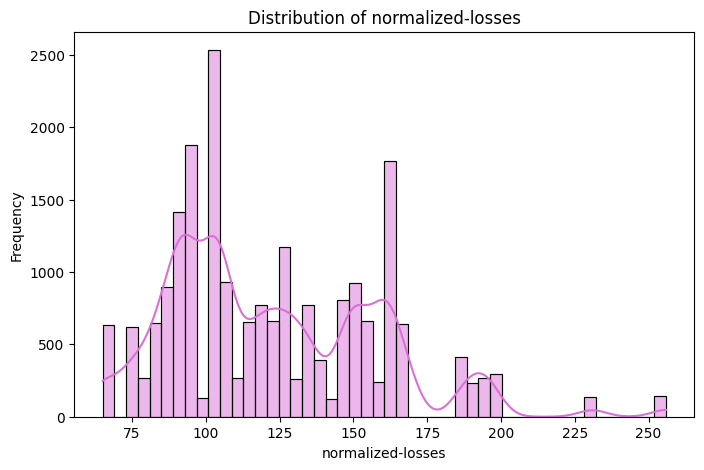

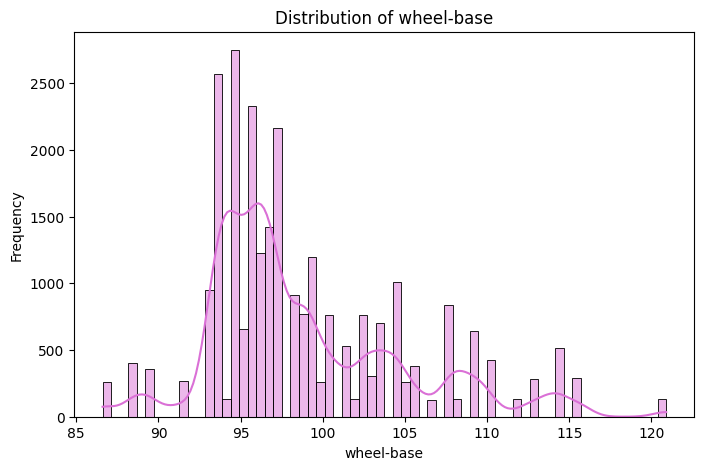

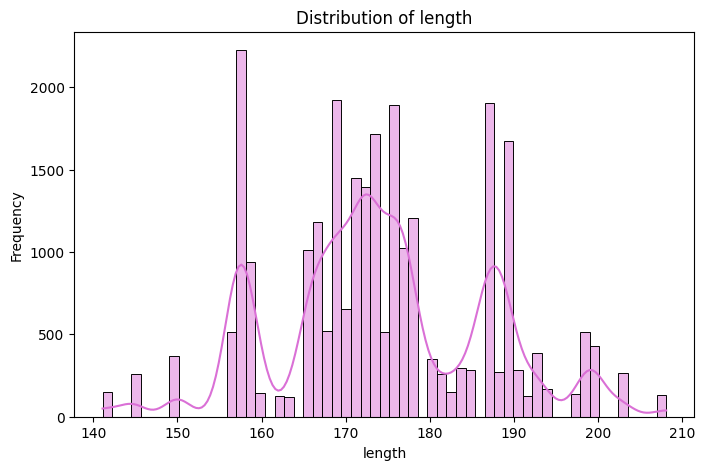

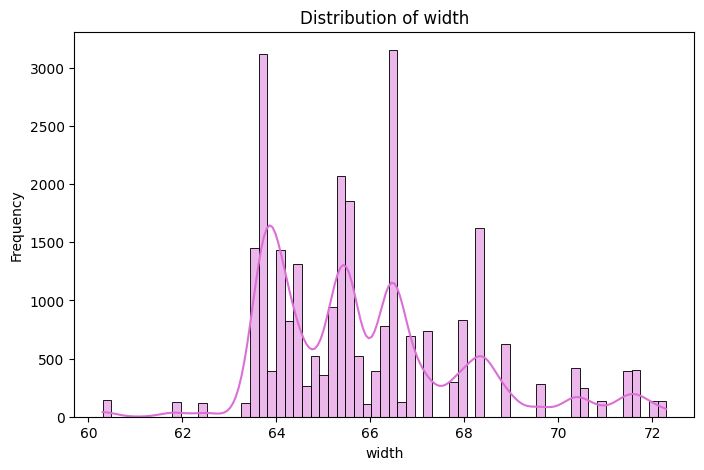

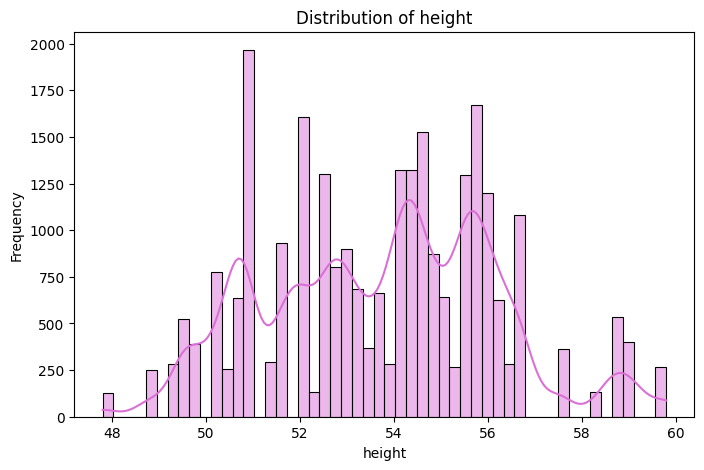

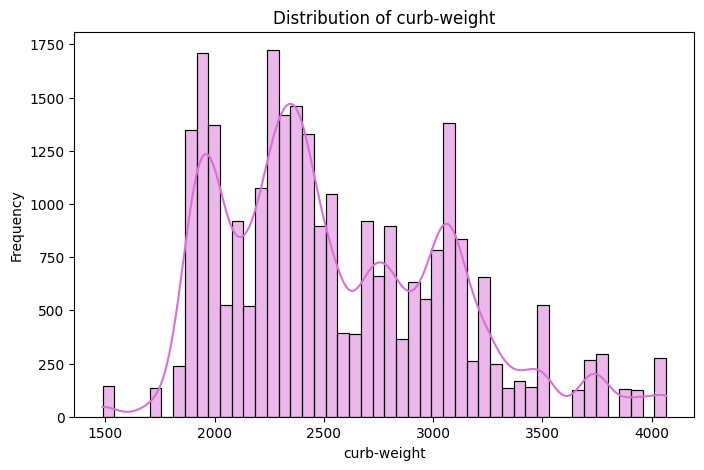

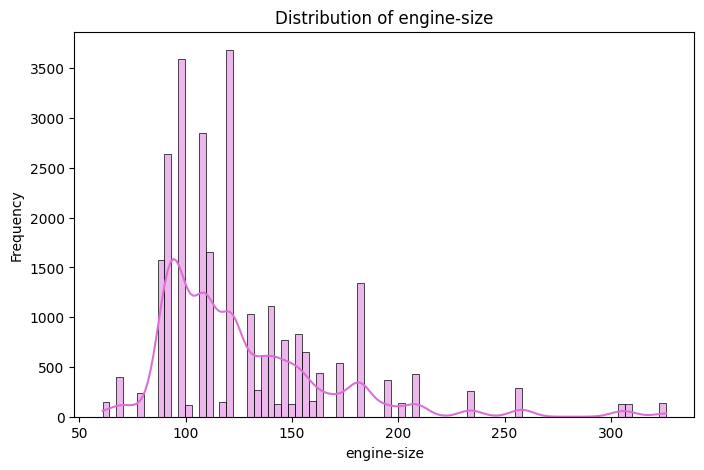

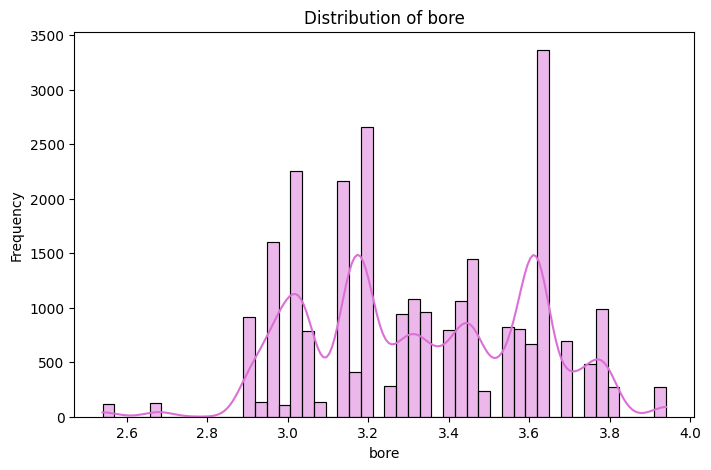

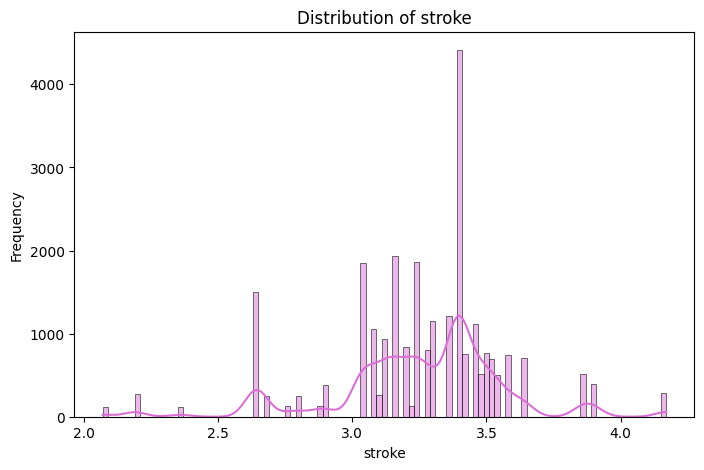

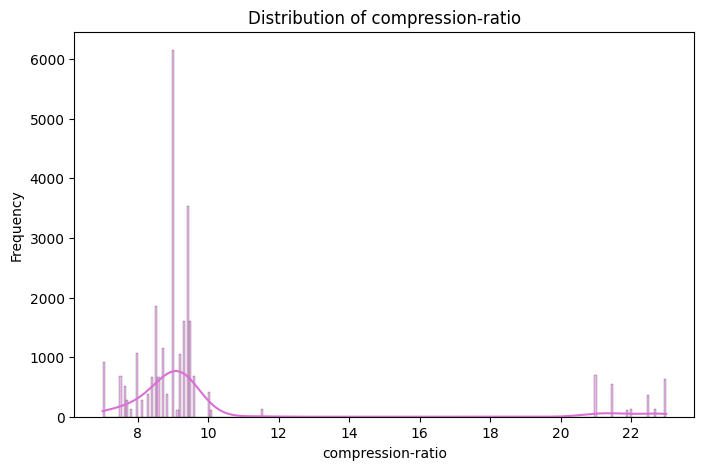

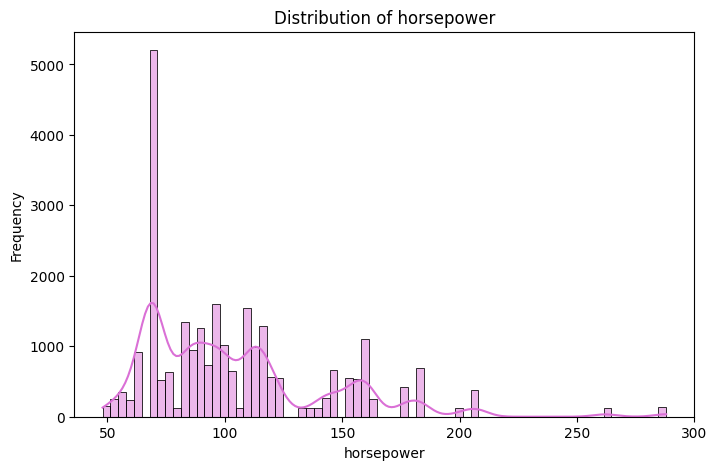

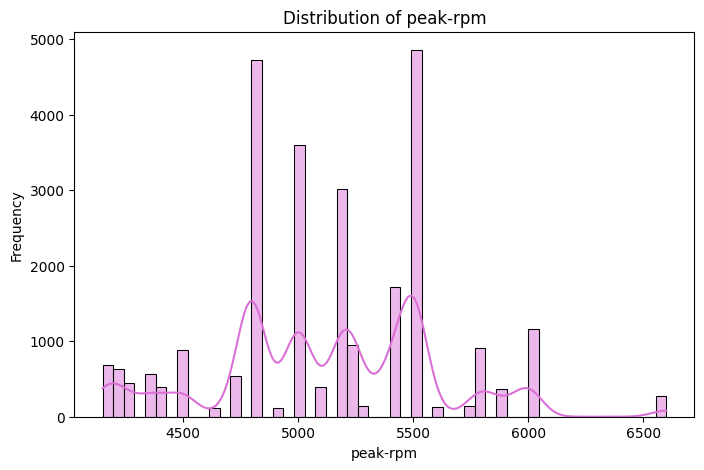

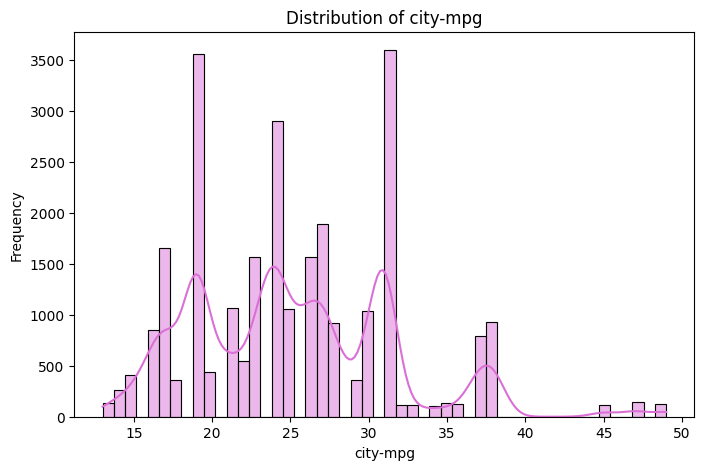

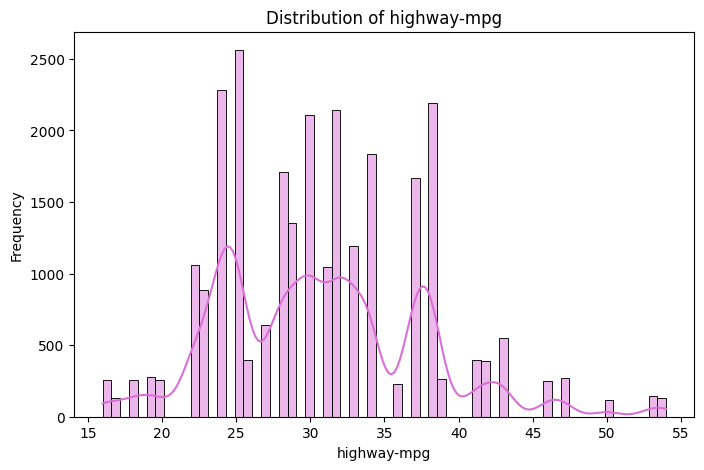

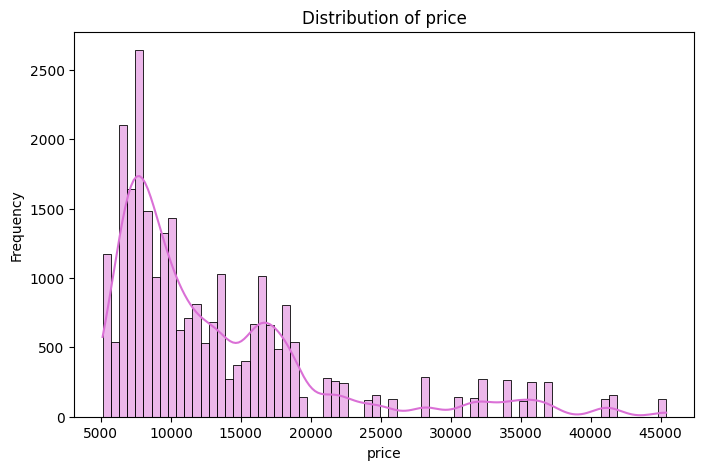

In [23]:
for col in numerical_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_[col].dropna(), kde=True, color='orchid')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Focusing on columns which have great impact on my price
- For that I need to get correlations 
- For correlations I need to have heatmap

In [13]:
data_.select_dtypes(include='object').value_counts()

make         fuel-type  aspiration  num-of-doors  body-style  drive-wheels  engine-location  engine-type  num-of-cylinders  fuel-system
honda        gas        std         two           hatchback   fwd           front            ohc          four              1bbl           670
toyota       gas        std         four          sedan       fwd           front            ohc          four              2bbl           629
bmw          gas        std         four          sedan       rwd           front            ohc          six               mpfi           521
mitsubishi   gas        turbo       two           hatchback   fwd           front            ohc          four              spdi           487
mazda        gas        std         two           hatchback   fwd           front            ohc          four              2bbl           458
                                                                                                                                          ... 
alfa-r

### Encoding
- using label encoding because my models are tree based. 

In [24]:
cat_col_for_encoding = data_.select_dtypes(include='object')
cat_col_for_encoding=cat_col_for_encoding.columns

In [27]:
data_encoded = pd.get_dummies(data_)
data_encoded

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,NaN,88.6,168.8,64.1,NaN,2548.0,NaN,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,NaN,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,NaN,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.0,99.4,NaN,NaN,54.3,2824.0,136.0,NaN,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,3.0,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,...,False,True,False,False,False,False,False,True,False,False
29991,NaN,168.0,94.5,168.7,64.0,52.6,2300.0,98.0,3.24,NaN,...,False,False,False,False,False,False,False,True,False,False
29992,1.0,113.0,93.1,166.8,64.2,54.1,1945.0,91.0,3.03,NaN,...,False,False,False,True,False,False,False,False,False,False
29993,3.0,186.0,94.5,168.9,NaN,50.2,2778.0,151.0,3.94,NaN,...,False,False,False,False,False,False,False,True,False,False


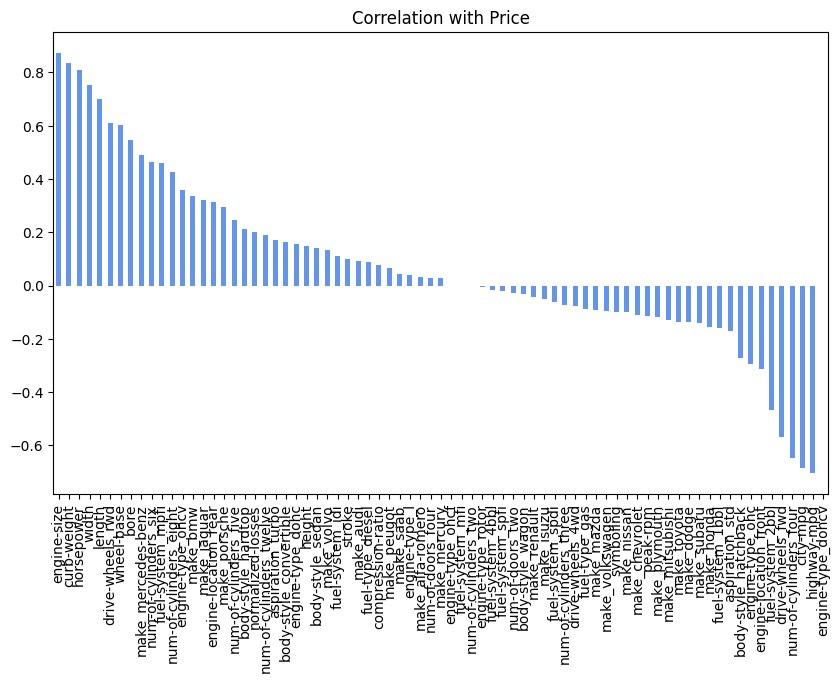

In [ ]:
corr_matrix = data_encoded.corr()
corr_with_price = corr_matrix['price']
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.show()

plt.figure(figsize=(10, 6))
corr_with_price.drop('price').sort_values(ascending=False).plot(kind='', color='cornflowerblue')
plt.title('Correlation with Price')
plt.show()



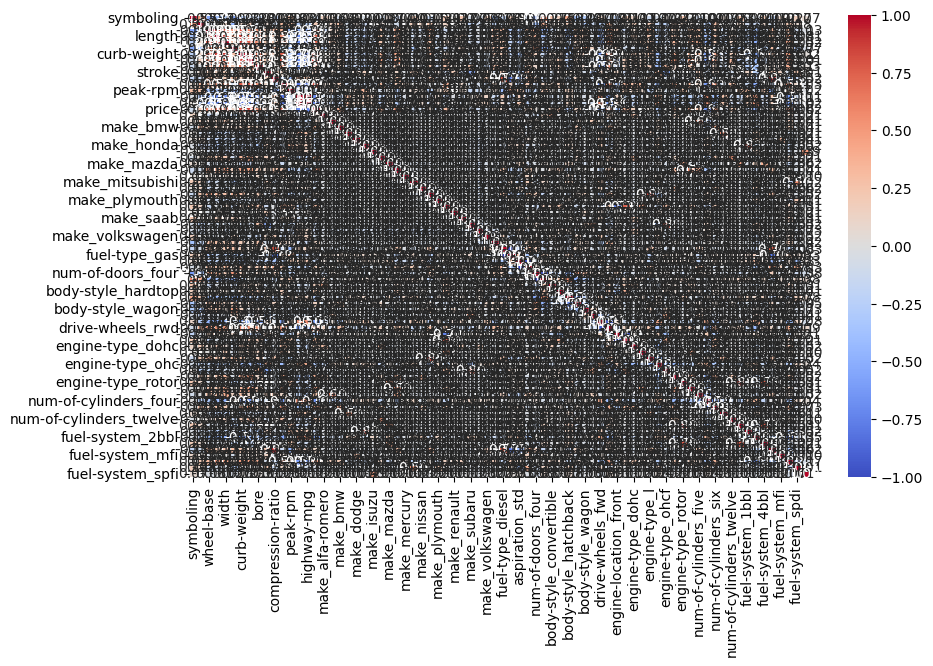

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()